<a href="https://colab.research.google.com/github/MuazDhanse/Anudip-Foundation/blob/main/Audip_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aim:**
To analyze and understand patterns and trends in the sales of a Global Store that operates internationally. To understand which products are most profitable and which areas generate more profit. In contrast, to observe which areas are not doing well.

# Step 1: Import Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('globalstore.csv', encoding = 'latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

# Step 2: Data Cleaning

1. Standardizing Column Names

In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          51290 non-null  int64  
 1   order_id        51290 non-null  object 
 2   order_date      51290 non-null  object 
 3   ship_date       51290 non-null  object 
 4   ship_mode       51290 non-null  object 
 5   customer_id     51290 non-null  object 
 6   customer_name   51290 non-null  object 
 7   segment         51290 non-null  object 
 8   city            51290 non-null  object 
 9   state           51290 non-null  object 
 10  country         51290 non-null  object 
 11  postal_code     9994 non-null   float64
 12  market          51290 non-null  object 
 13  region          51290 non-null  object 
 14  product_id      51290 non-null  object 
 15  category        51290 non-null  object 
 16  sub-category    51290 non-null  object 
 17  product_name    51290 non-null 

2. Removing Unnecessary Columns

In [4]:
df = df.drop(columns=['row_id', 'ship_mode', 'customer_name','postal_code', 'product_name', 'order_priority'])
df.head()

,order_id,order_date,ship_date,customer_id,segment,city,state,country,market,region,product_id,category,sub-category,sales,quantity,discount,profit,shipping_cost
0,CA-2012-124891,7/31/2012,7/31/2012,RH-19495,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,2309.650,7,0.0,762.1845,933.57
1,IN-2013-77878,02-05-2013,02-07-2013,JR-16210,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63
2,IN-2013-71249,10/17/2013,10/18/2013,CR-12730,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,5175.171,9,0.1,919.9710,915.49
3,ES-2013-1579342,1/28/2013,1/30/2013,KM-16375,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,2892.510,5,0.1,-96.5400,910.16
4,SG-2013-4320,11-05-2013,11-06-2013,RH-9495,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,2832.960,8,0.0,311.5200,903.04


3. Checking Anomalies

In [5]:
# Missing Values
missing_values = df.isnull().sum()

# Duplicated Values
duplicates = df.duplicated().sum()

# Displaying Missing/Duplicate Values information
missing_values, duplicates

(order_id         0
 order_date       0
 ship_date        0
 customer_id      0
 segment          0
 city             0
 state            0
 country          0
 market           0
 region           0
 product_id       0
 category         0
 sub-category     0
 sales            0
 quantity         0
 discount         0
 profit           0
 shipping_cost    0
 dtype: int64,
 0)

# Step 3: Visualization Using Numpy

In [6]:
# Calculating Total Sales
total_sales = np.sum(df['sales'])
print(f'Total Sales: {total_sales}')

# Calculating Total Profit
total_profit = np.sum(df['profit'])
print(f'Total Profit: {total_profit}')

# Calculating Average Profit/Order
mean_profit = np.mean(df['profit'])
print(f'Average Profit/Order: {mean_profit}')

# Calculating Correlation
corr_sales_profit = np.corrcoef(df['sales'].astype(float), df['profit'].astype(float))[0,1]
print(f'Correlation: {corr_sales_profit}')

Total Sales: 12642501.909880001
Total Profit: 1467457.29128
Average Profit/Order: 28.61098247767596
Correlation: 0.48491811261944473


What questions does this analysis answer?

1. What is the total amount of sales?
2. What is the total amount of profit generated?
3. What is the average profit per order?
4. Is there a strong positive relationship between sales and profit?
5. Do higher sales generally result in higher profits, or is the relationship weak?



# Step 4: Visualization using Pandas

In [7]:
# Summary statistics
summary_stats = df.describe()
summary_stats

,sales,quantity,discount,profit,shipping_cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915
std,487.565361,2.278766,0.212280,174.340972,57.296804
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


What questions does this analysis answer?

1. What are the average sales and profits?
2. What is the range of sales and profits?
3. How dispersed are the sales and profits?

In [8]:
# Calculating Profit by category

profit_by_category = df.groupby('category')['profit'].sum().astype(int)
profit_by_category

category
Furniture          285204
Office Supplies    518473
Technology         663778
Name: profit, dtype: int64

In [9]:
# Calculating Sales by category

sales_by_category = df.groupby('category')['sales'].sum().astype(int)
sales_by_category

category
Furniture          4110874
Office Supplies    3787070
Technology         4744557
Name: sales, dtype: int64

In [10]:
# Calculating Profit by region

profit_by_region = df.groupby('region')['profit'].sum()
profit_by_region

region
Africa             88871.63100
Canada             17817.39000
Caribbean          34571.32104
Central           311403.98164
Central Asia      132480.18700
EMEA               43897.97100
East               91522.78000
North             194597.95252
North Asia        165578.42100
Oceania           120089.11200
South             140355.76618
Southeast Asia     17852.32900
West              108418.44890
Name: profit, dtype: float64

In [11]:
# Calculating Sales by region

sales_by_region = df.groupby('region')['sales'].sum().astype(int)
sales_by_region

region
Africa             783773
Canada              66928
Caribbean          324280
Central           2822302
Central Asia       752826
EMEA               806161
East               678781
North             1248165
North Asia         848309
Oceania           1100184
South             1600907
Southeast Asia     884423
West               725457
Name: sales, dtype: int64

In [12]:
# Pivot table describing 'Sum of Profit' per 'Product Sub-Category' per 'Region'

pivot_table = df.pivot_table(values='profit', index=['region'], columns=['category'], aggfunc='sum')
pivot_table

category,Furniture,Office Supplies,Technology
region,,,
Africa,16262.0850,28480.0530,44129.49300
Canada,2613.2400,7957.5300,7246.62000
Caribbean,6223.4600,14818.2760,13529.58504
Central,54550.8401,121314.7209,135538.42064
Central Asia,48935.7120,27104.5000,56439.97500
EMEA,11534.1360,14869.3920,17494.44300
East,3046.1658,41014.5791,47462.03510
North,30922.0680,64403.3930,99272.49152
North Asia,52181.3010,40926.1050,72471.01500


What questions does this analysis answer?

1. Which product categories generate the most profit?
2. Which categories have the most sales?
3. Which regions are the most profitable?
4. Which regions contribute the most sales?
5. How dispersed are the sales and profits?
6. How do sales compare across different regions and product categories?
7. Which region-category combinations are the most lucrative?

# Step 5: Visualization Using Matplotlib

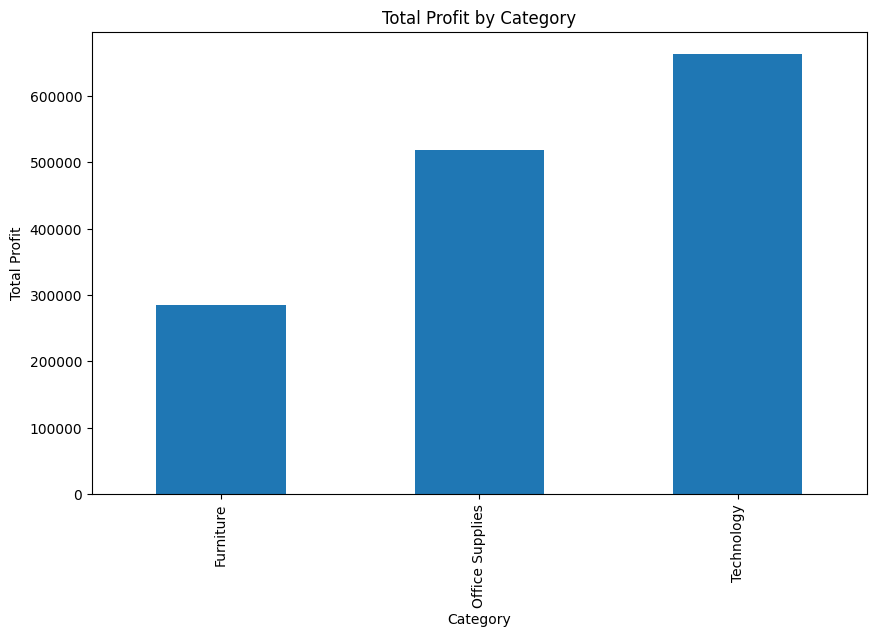

In [13]:
# Profit by category

plt.figure(figsize=(10, 6))
profit_by_category.plot(kind='bar')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()

What questions does this analysis answer?

1. Which product categories generate the most profit?
2. How does profit vary across different product categories?

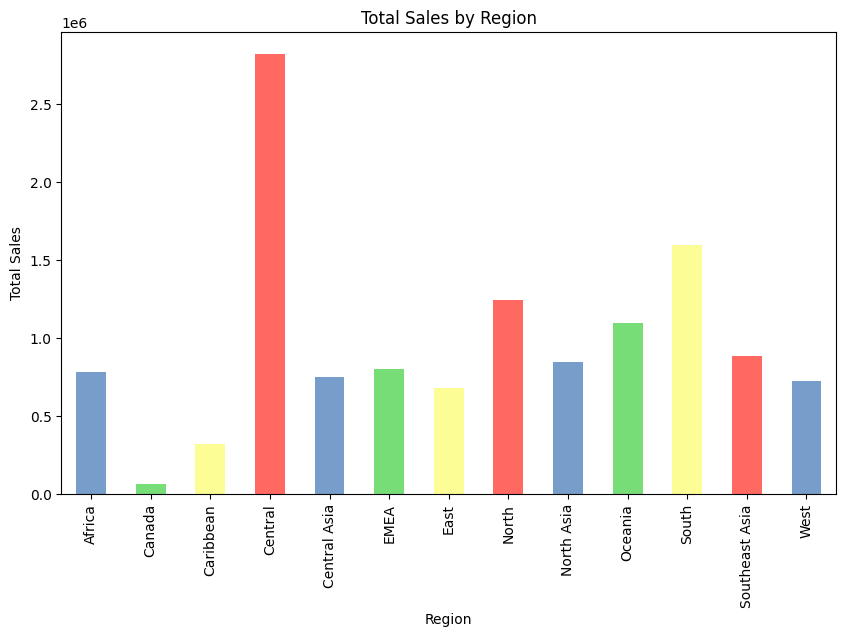

In [21]:
# Sales by region

plt.figure(figsize=(10, 6))
colors = ['#779ECB', '#77DD77', '#FDFD96', '#FF6961']
sales_by_region.plot(kind='bar', color = colors)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

What questions does this analysis answer?
1. Which regions have the highest sales?
2. How do sales compare across different regions?

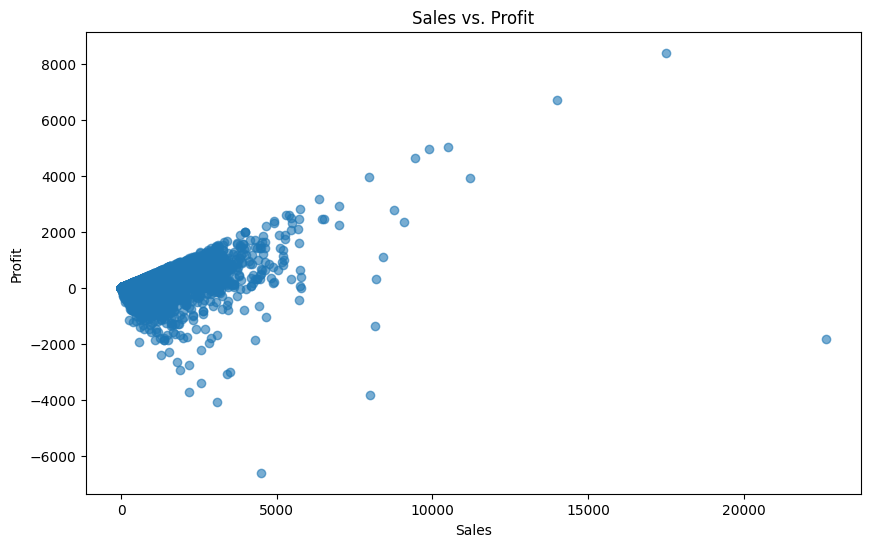

In [15]:
# Sales vs Profit Analysis

plt.figure(figsize=(10, 6))
plt.scatter(df['sales'], df['profit'], alpha=0.6)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

What questions does this analysis answer?
1. Is there a positive correlation between sales and profit?
2. Are there any orders with high sales but low profit or vice versa?

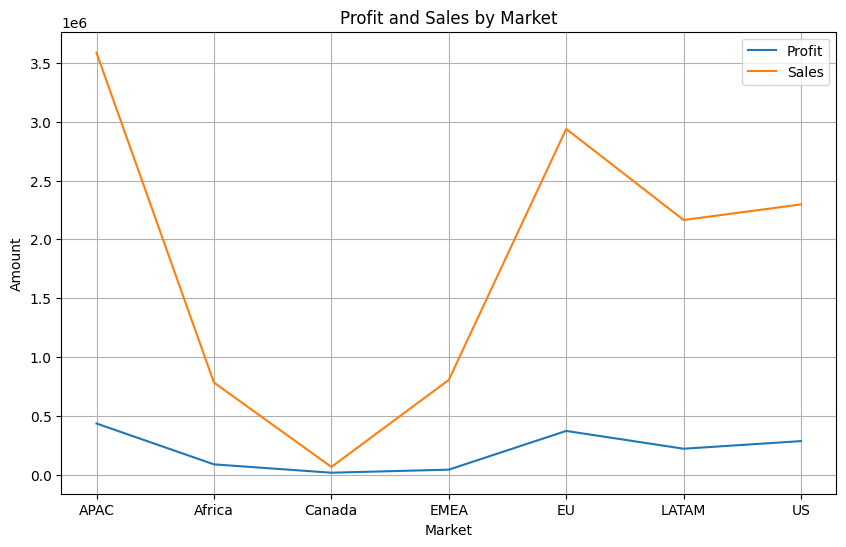

In [16]:
data = df.groupby('market')['profit'].sum()
data2 = df.groupby('market')['sales'].sum()
x1 = data.index
y1 = data.values
x2 = data2.index
y2 = data2.values

plt.figure(figsize=(10, 6))
plt.plot(x1, y1, label='Profit')
plt.plot(x2, y2, label='Sales')
plt.title('Profit and Sales by Market')
plt.xlabel('Market')
plt.ylabel('Amount')
plt.grid()
plt.legend()
plt.show()

What questions does this analysis answer?
1. What is the relation between sales and profit in different markets?
2. Which market performs good and which one does not?